# Annotated RDM plots

Some advanced manipulations on your RDM plots

In [1]:
import matplotlib.pyplot as plt
import numpy
from rsatoolbox.rdm.rdms import RDMs
from rsatoolbox.vis.rdm_plot import show_rdm, Symmetry, MultiRdmPlot

Let's start with an example RDMs object, with some random dissimilarity values between 0.25 and 0.75

In [2]:
dissim_utv = 0.25+(0.5*numpy.random.rand(5, 36)) ## 9x9 rdm
rdms = RDMs(
    dissimilarities=dissim_utv,
    dissimilarity_measure='random',
)

Let's define the clusters to highlight or contour as a boolean vector with as many values as pairs in the RDM

In [3]:
mask = numpy.zeros([36], dtype=bool)
mask[[1, 2]] = True
mask[[11, 12, 13, 18, 19]] = True

Now we make a basic RDM plot

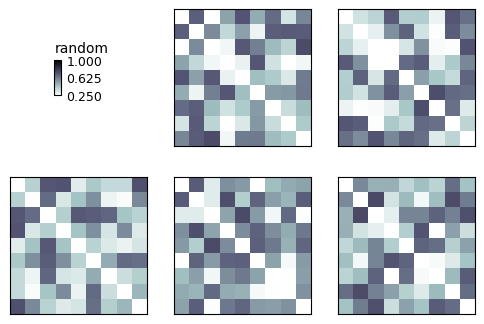

In [4]:
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure')
plt.show()

## Highlight

Here we use the mask to specify clusters to highlight

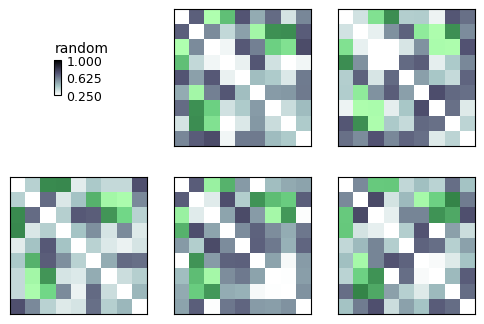

In [5]:
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure', overlay=mask)
plt.show()

## Contour

But we can also visualize the clusters with a contour:

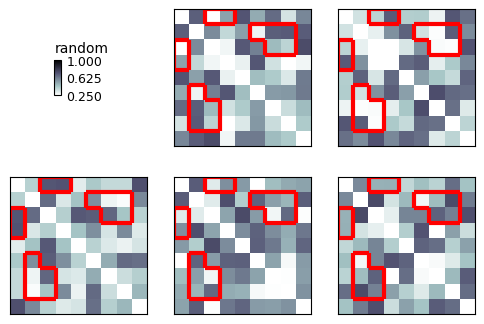

In [6]:
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure', contour=mask)
plt.show()

You can customize the color and choose the side(s) of the RDM to plot on:

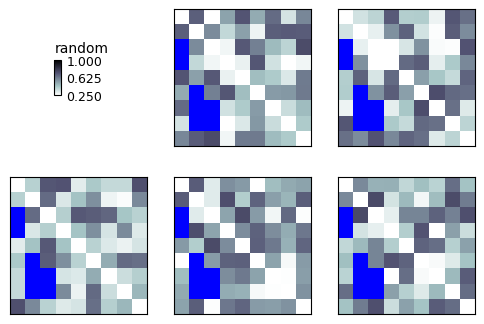

In [7]:
# Symmetry.BOTH, Symmetry.UPPER, Symmetry.LOWER
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure', overlay=mask, overlay_color='blue', overlay_symmetry=Symmetry.LOWER)
plt.show()

Use a CSS-style hexadecimal RGBA color string to specify a color and transparency:

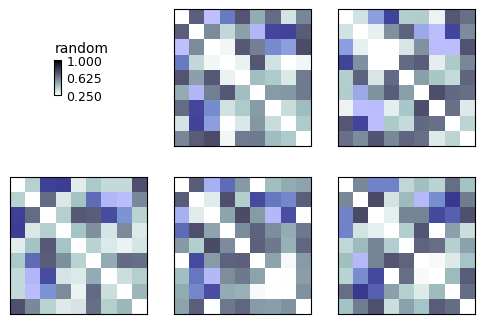

In [8]:
color = '#0000ff40' # Red (00), Green (00), Blue (ff = 16*16 = 256), alpha (opacity) 40%
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure', overlay=mask, overlay_color=color)
plt.show()

We can make a new RDMs object that includes the mask

In [9]:
rdms_plus = RDMs(
    dissimilarities=numpy.concatenate([dissim_utv, mask[numpy.newaxis, :]]),
    dissimilarity_measure='random',
    rdm_descriptors=dict(name=['a', 'b', 'c', 'd', 'e', 'mask'])
)

Now we can specify the mask via RDM descriptor:

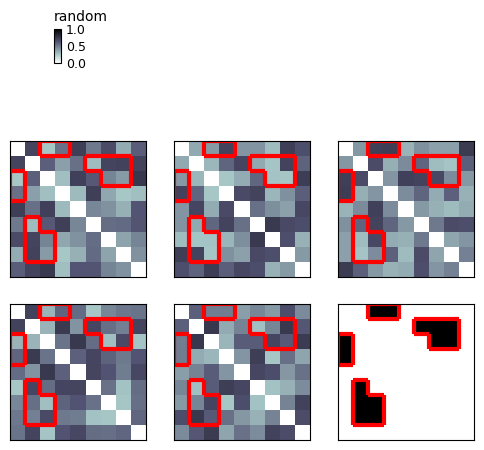

In [10]:
show_rdm(rdms_plus, vmin=0, vmax=1, show_colorbar='figure', contour=('name', 'mask'))
plt.show()

You can also build the plot in Object-Oriented style:

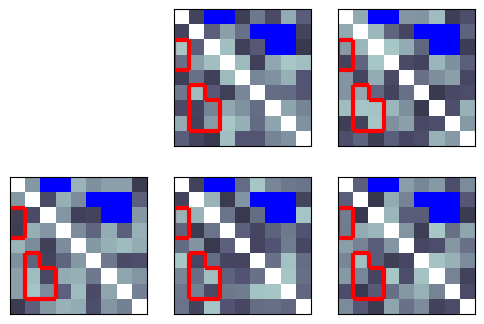

In [11]:
rdm_plot = MultiRdmPlot(rdms)
rdm_plot.vmin = 0
rdm_plot.vmax = 1
rdm_plot.addOverlay(mask, 'blue', Symmetry.UPPER)
rdm_plot.addContour(mask, 'red', Symmetry.LOWER)
rdm_plot.plot()